In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist


In [2]:
# Load the dataset
url = "/content/default.csv"
data = pd.read_csv(url)

# Define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiate and fit the logistic regression model
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

LogisticRegression()

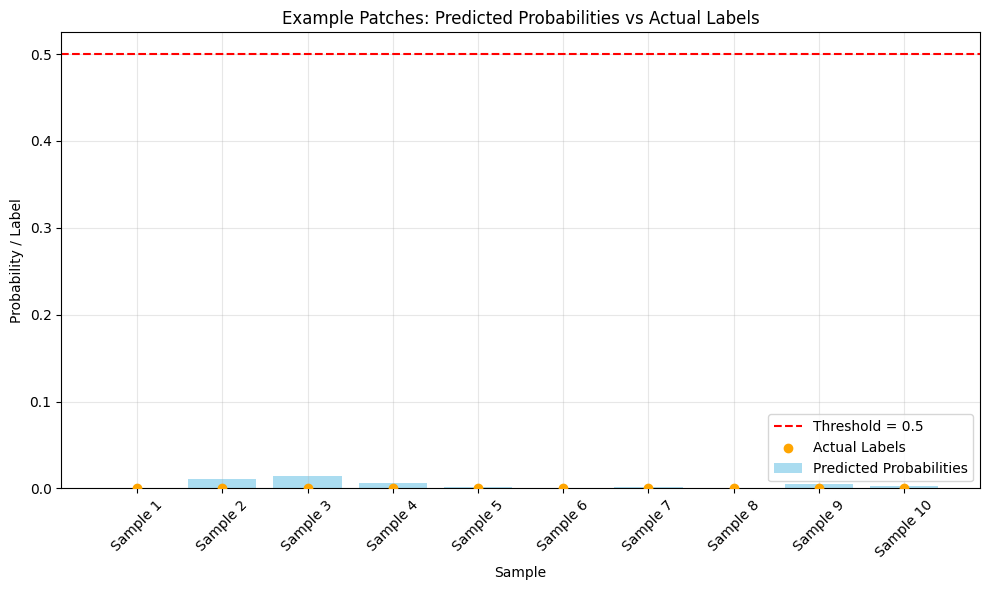

In [3]:
# Sample a subset of the test set to visualize
num_patches = 10  # Number of examples to visualize
sample_indices = np.random.choice(X_test.index, num_patches, replace=False)
sample_data = X_test.loc[sample_indices]
sample_probs = log_regression.predict_proba(sample_data)[:, 1]
sample_actuals = y_test.loc[sample_indices]

# Create a bar plot for probabilities
plt.figure(figsize=(10, 6))
x_labels = [f"Sample {i+1}" for i in range(num_patches)]

# Bar plot of predicted probabilities
plt.bar(x_labels, sample_probs, color='skyblue', alpha=0.7, label='Predicted Probabilities')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold = 0.5')

# Overlay actual labels as points
plt.scatter(x_labels, sample_actuals, color='orange', label='Actual Labels', zorder=5)

# Plot settings
plt.title("Example Patches: Predicted Probabilities vs Actual Labels")
plt.xlabel("Sample")
plt.ylabel("Probability / Label")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 - 5s - 3ms/step - accuracy: 0.9254 - loss: 0.2612
Epoch 2/3
1875/1875 - 2s - 1ms/step - accuracy: 0.9658 - loss: 0.1136
Epoch 3/3
1875/1875 - 3s - 1ms/step - accuracy: 0.9760 - loss: 0.0783
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


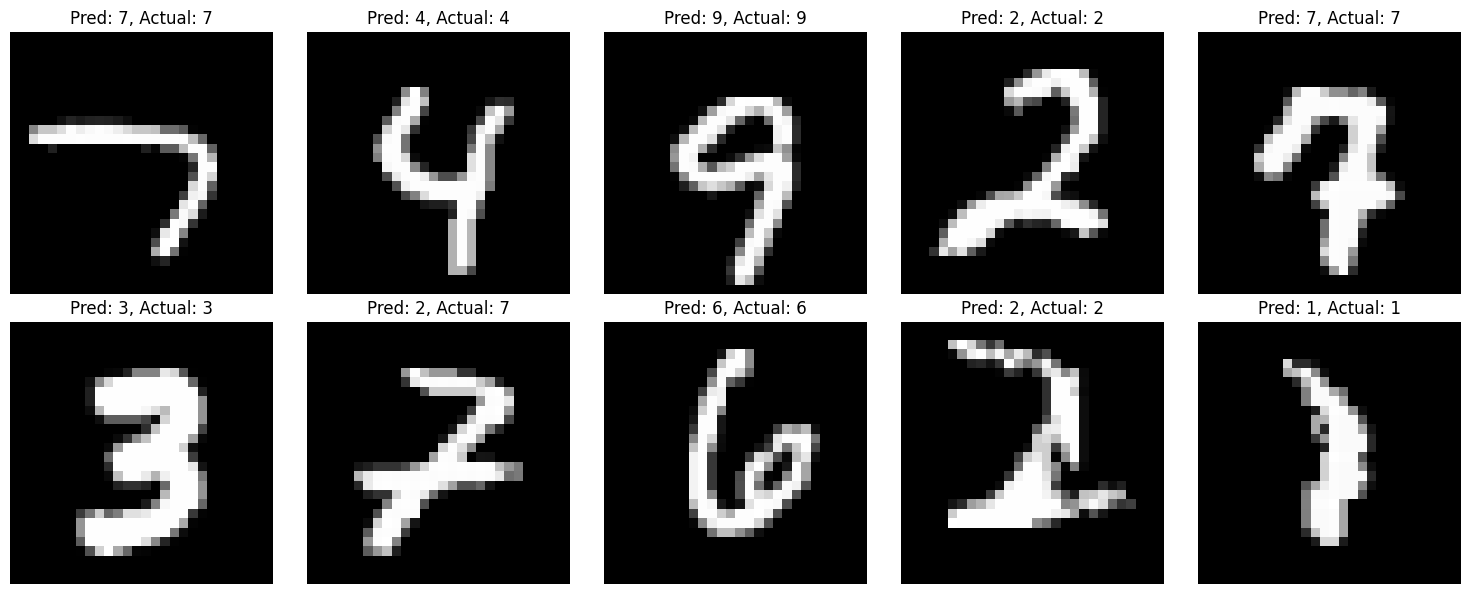

In [4]:

# Load the MNIST dataset (example image dataset)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images
X_train, X_test = X_train / 255.0, X_test / 255.0

# Create a simple model for demonstration
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=2)

# Predict probabilities on the test set
y_pred_probs = model.predict(X_test)

# Visualize a few random patches (images) from the test set
num_patches = 10  # Number of patches to visualize
indices = np.random.choice(len(X_test), num_patches, replace=False)

# Plot the images with predictions and actual labels
plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {np.argmax(y_pred_probs[idx])}, Actual: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
